In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

filename = "modifygamingdata.csv"

df = pd.read_csv(filename)

### Need to deal with critic score and see if that has any importance

# Getting a feel for our data 

### Below we...
### check the first 5 entries 
### grab column names to preprocess/manipulate later
### describe the numerical data with statistical means
### Plot the original Heatmap with correlation data to see any trends within the raw data 
### Make histogram of Global Sales to find out how many copies are the most elite samples selling

In [2]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
2,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Rockstar North,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
3,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
4,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,8.8,14.74,9.76,3.73,0.11,1.14,2010.0


In [3]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year'],
      dtype='object')

In [4]:
df.describe()

,Rank,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,3983.782308,7.590538,1.495185,0.694192,0.505731,0.121308,0.173823,2008.553846
std,3274.281962,1.176853,2.110743,1.051784,0.898886,0.192167,0.306553,4.758626
min,20.000000,3.200000,0.030000,0.010000,0.000000,0.000000,0.000000,1995.000000
25%,1305.250000,6.900000,0.370000,0.140000,0.050000,0.020000,0.020000,2006.000000
50%,3238.000000,7.800000,0.730000,0.300000,0.190000,0.050000,0.060000,2009.000000
75%,5865.500000,8.400000,1.655000,0.750000,0.530000,0.140000,0.190000,2011.000000
max,17048.000000,10.000000,20.320000,9.760000,9.850000,2.170000,3.120000,2018.000000


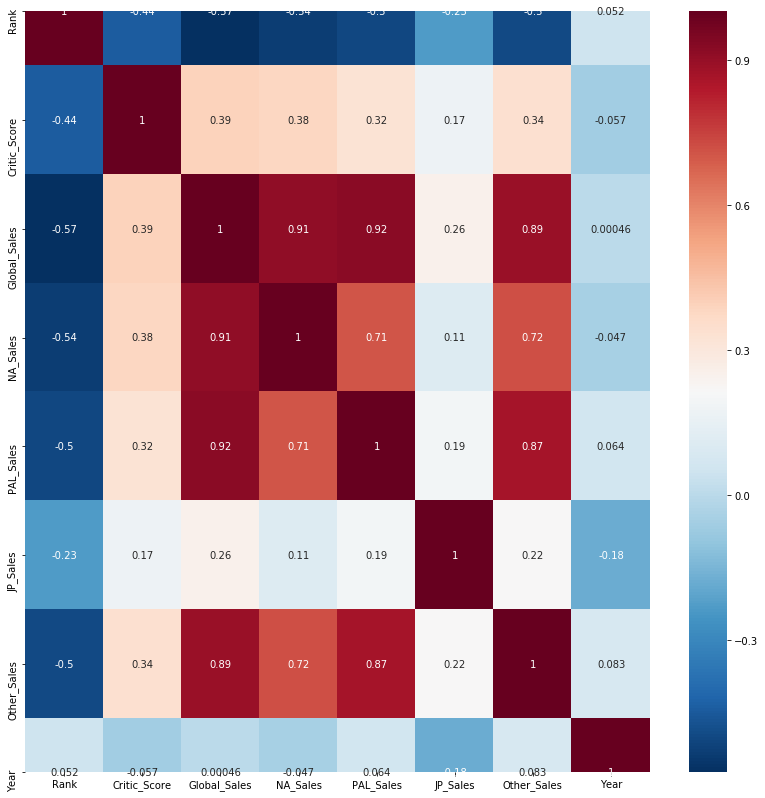

In [5]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r');

### Global sales are tied heavily to North American and PAL sales 
### Rank has little to negative effect as well as critic scores

### Examining Global Sales in general should be more effective

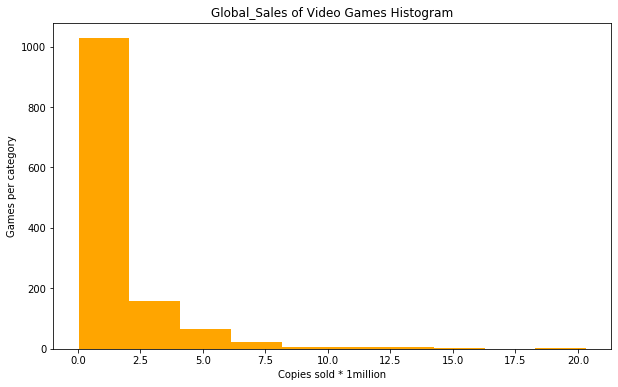

In [6]:
plt.figure(figsize=(10,6))
plt.hist(df["Global_Sales"] ,color='orange')
plt.title('Global_Sales of Video Games Histogram')
plt.xlabel('Copies sold * 1million')
plt.ylabel('Games per category');

In [7]:
sales = df[df["Global_Sales" ] > 3.5]
print(df.shape[0],len(sales))

1300 158


## Ideally want number of Global_sales to a non insignificant portion of our total sales

### 158/1300 $\approx$ 11.5%

### 3.5 ended up being the best choice without being too little data

In [8]:
df[df["Global_Sales" ] > 3.5]

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
2,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Rockstar North,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
3,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
4,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,8.8,14.74,9.76,3.73,0.11,1.14,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,445,Resident Evil 5,Action,M,X360,Capcom,Capcom,8.6,3.53,2.13,0.93,0.12,0.34,2009.0
154,447,NBA 2K17,Sports,E,PS4,2K Sports,Visual Concepts,9.0,3.52,2.28,0.59,0.03,0.63,2016.0
155,448,FIFA Soccer 11,Sports,E,X360,EA Sports,EA Canada,8.7,3.52,0.71,2.39,0.02,0.40,2010.0
156,449,Spyro 2: Ripto's Rage!,Platform,E,PS,Sony Computer Entertainment,Insomniac Games,8.7,3.52,2.14,1.21,0.01,0.17,1999.0


In [9]:
## add back to df
df['Hit Game'] = df['Global_Sales'].map(lambda x: x > 3.5)

In [10]:
df = df.replace(True, "1")

In [11]:
df = df.replace(False, "0")

In [12]:
df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Hit Game
0,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.4,20.32,6.37,9.85,0.99,3.12,2013.0,1
1,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,19.39,6.06,9.71,0.6,3.02,2014.0,1
2,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Rockstar North,9.6,16.15,8.41,5.49,0.47,1.78,2002.0,1
3,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,8.7,14.82,9.07,4.29,0.13,1.33,2011.0,1
4,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,8.8,14.74,9.76,3.73,0.11,1.14,2010.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,14665,Warriors Orochi 2,Action,T,X360,KOEI,Omega Force,4.6,0.06,0.04,0,0.01,0,2008.0,0
1296,14973,Virtua Striker 2002,Sports,E,GC,Sega,Amusement Vision,6.6,0.05,0.01,0,0.03,0,2002.0,0
1297,15290,GrimGrimoire,Strategy,E10,PS2,NIS America,Vanillaware,7.7,0.05,0.01,0.01,0.03,0,2007.0,0
1298,15835,Metal Gear Solid: Digital Graphic Novel,Misc,M,PSP,Konami,Kojima Productions,7.6,0.04,0.02,0,0.02,0,2006.0,0


# Exploring our data futher after removing incomplete data

In [13]:
### Looking at avg score of our games dataset

In [14]:
avg_critic_score = df["Critic_Score"].mean()

In [15]:
print (("Average critic score: "), avg_critic_score)

Average critic score:  7.590538461538469


In [16]:
### Looking at avg global sales of our games dataset

In [17]:
avg_global_sales = df["Global_Sales"].astype('float')

In [18]:
avg_global_sales = avg_global_sales.mean()

In [19]:
print (("Average global sales in millions: "), avg_global_sales)

Average global sales in millions:  1.495184615384612


In [20]:
### Looking at the counts of the game ratings

In [21]:
ratings_count = df["ESRB_Rating"].value_counts()

In [22]:
print (("Counts of ESRB Ratings:\n"), ratings_count)

Counts of ESRB Ratings:
 T      474
M      357
E      325
E10    144
Name: ESRB_Rating, dtype: int64


In [23]:
### Looking at the counts of the platforms

In [24]:
platform_count = df["Platform"].value_counts()

In [25]:
print (("Counts of Platform:\n"), platform_count)

Counts of Platform:
 PS3     266
X360    265
PS2     117
PSP      99
DS       89
Wii      87
3DS      81
PS       78
PS4      57
NS       43
GC       29
WiiU     25
GBA      24
N64      14
XOne     11
XB        7
GBC       2
DC        2
GB        1
PSN       1
PSV       1
SAT       1
Name: Platform, dtype: int64


# Changing our catergorical data into dummy values

In [26]:
enc = OneHotEncoder(handle_unknown='ignore')

In [27]:
## Getting k - 1 categorial columns from each category

dummy_df = pd.get_dummies(df, columns = ['Rank','Genre', 'ESRB_Rating', 'Platform', 'Publisher','Developer', 'Critic_Score'])
dummy_df = dummy_df.drop(["Global_Sales","Name","PAL_Sales","JP_Sales","Other_Sales","NA_Sales", "Hit Game"], axis =1)

## Make sure it worked, look at all them columns
dummy_df.head()

,Year,Rank_20,Rank_21,Rank_31,Rank_41,Rank_42,Rank_46,Rank_50,Rank_51,Rank_52,...,Critic_Score_9.0,Critic_Score_9.1,Critic_Score_9.2,Critic_Score_9.3,Critic_Score_9.4,Critic_Score_9.5,Critic_Score_9.6,Critic_Score_9.7,Critic_Score_9.8,Critic_Score_10.0
0,2013.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2014.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2002.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2011.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Lets try linear regression to see how well it fits

In [28]:
target = df["Hit Game"].values
features = dummy_df[list(dummy_df.columns)].values

regression = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

## Standard scaler is much more influence by large or very small outliers
#scaler = StandardScaler()

# Min max scaler puts all values in range [0,1] reducing outlier influence
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regression.fit(X_train, y_train)

predictions = regression.predict(X_test)

Accuracy = regression.score(X_train, y_train)
#print (("Accuracy for training set: "), Accuracy*100, "%")

lin_accuracy = regression.score(X_test, y_test)
print (("Accuracy for testing set"), lin_accuracy*100, "%" )

Accuracy for testing set 17.68606254362495 %


## That was bad... lets not talk about that 

## Trying Logistic regression 

In [29]:
logreg = LogisticRegression()

In [30]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
X=df[['Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Critic_Score']]
y=df['Hit Game']

In [32]:
X = pd.get_dummies(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
logreg.fit(X_train,y_train) ## Maybe tune these later 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
logreg.predict(X_test)

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0

In [36]:
predictions = logreg.predict(X_test)

In [37]:
predictions.shape

(260,)

## Test model accuracy

In [38]:
log_accuracy = logreg.score(X_test,y_test)
print(log_accuracy)

0.9153846153846154


In [39]:
confuse = confusion_matrix(y_test,predictions)

In [40]:
confuse

array([[227,   1],
       [ 21,  11]], dtype=int64)

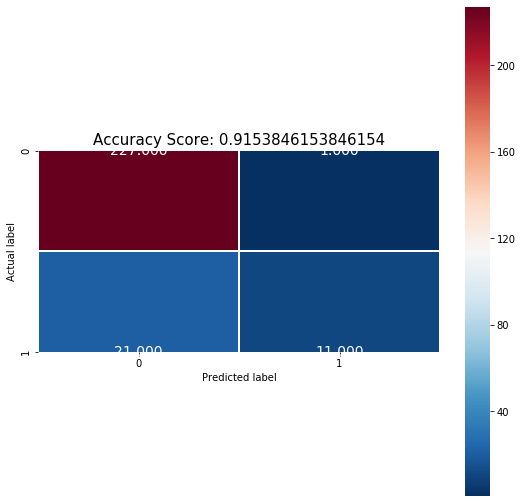

In [41]:
plt.figure(figsize=(9,9))
sns.heatmap(confuse, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu_r',annot_kws={"size":14})
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log_accuracy)
plt.title(all_sample_title, size = 15);

# Random Forests

In [42]:
X=df[['Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Critic_Score']]
y=df['Hit Game']
X = pd.get_dummies(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [45]:
model = clf.fit(X_train,y_train)

In [46]:
y_pred=clf.predict(X_test)

In [47]:
random_accuracy = metrics.accuracy_score(y_test, y_pred)

In [48]:
print (("Accuracy: "), random_accuracy*100, "%" )

Accuracy:  91.53846153846153 %


In [49]:
confuse = confusion_matrix(y_test,y_pred)

In [50]:
confuse

array([[333,   6],
       [ 27,  24]], dtype=int64)

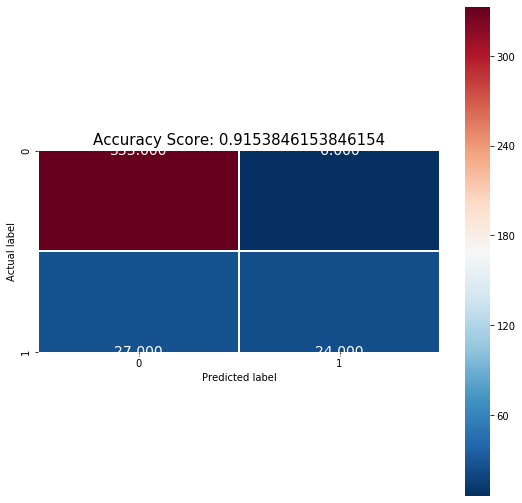

In [51]:
plt.figure(figsize=(9,9))
sns.heatmap(confuse, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu_r',annot_kws={"size":14})
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_accuracy)
plt.title(all_sample_title, size = 15);

In [52]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [53]:
feature_importances

,importance
Critic_Score,0.200812
Platform_PS2,0.037065
Platform_PS4,0.035378
Developer_Naughty Dog,0.033144
Developer_Infinity Ward,0.032155
...,...
Developer_Career Soft,0.000000
Developer_Ready at Dawn,0.000000
Developer_Realtime Worlds,0.000000
Developer_Replay Studios,0.000000


In [54]:
feature_importances = feature_importances[feature_importances["importance"] > 0.005]

In [55]:
feature_importances.head(25)

,importance
Critic_Score,0.200812
Platform_PS2,0.037065
Platform_PS4,0.035378
Developer_Naughty Dog,0.033144
Developer_Infinity Ward,0.032155
Developer_Bethesda Game Studios,0.023041
Developer_Rockstar North,0.020745
Genre_Action,0.020405
Developer_EA DICE,0.020206
Developer_Ubisoft Montreal,0.020146


# Decision Trees

In [56]:
X=df[['Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Critic_Score']]
y=df['Hit Game']
X = pd.get_dummies(X)
X_cols = list(X.columns)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Using Gini

[Text(234.8714453584019, 213.0912, 'X[0] <= 8.55\ngini = 0.211\nsamples = 910\nvalue = [801, 109]'),
 Text(174.28484136310226, 204.3936, 'X[378] <= 0.5\ngini = 0.122\nsamples = 722\nvalue = [675, 47]'),
 Text(170.08836662749707, 195.696, 'X[220] <= 0.5\ngini = 0.115\nsamples = 719\nvalue = [675, 44]'),
 Text(165.8918918918919, 186.9984, 'X[33] <= 0.5\ngini = 0.108\nsamples = 716\nvalue = [675, 41]'),
 Text(154.35158636897768, 178.3008, 'X[121] <= 0.5\ngini = 0.076\nsamples = 653\nvalue = [627, 26]'),
 Text(150.1551116333725, 169.60320000000002, 'X[141] <= 0.5\ngini = 0.071\nsamples = 651\nvalue = [627, 24]'),
 Text(145.95863689776735, 160.9056, 'X[62] <= 0.5\ngini = 0.065\nsamples = 649\nvalue = [627, 22]'),
 Text(141.76216216216218, 152.208, 'X[351] <= 0.5\ngini = 0.063\nsamples = 648\nvalue = [627, 21]'),
 Text(137.56568742655702, 143.5104, 'X[105] <= 0.5\ngini = 0.06\nsamples = 647\nvalue = [627, 20]'),
 Text(133.36921269095183, 134.81279999999998, 'X[254] <= 0.5\ngini = 0.057\nsamp

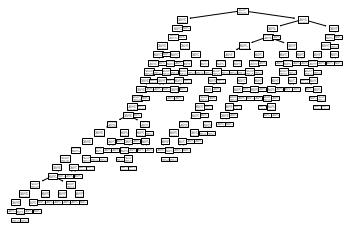

In [58]:
clf_g = tree.DecisionTreeClassifier(criterion="gini")
clf_g = clf_g.fit(X_train, y_train)
y_pred = clf_g.predict(X_test)
tree.plot_tree(clf_g)

In [59]:
deci_tree_gini_accuracy = metrics.accuracy_score(y_test, y_pred)

In [60]:
print (("Accuracy: "), deci_tree_gini_accuracy*100, "%" )

Accuracy:  93.58974358974359 %


In [61]:
confuse = confusion_matrix(y_test,y_pred)

In [62]:
confuse

array([[331,  10],
       [ 15,  34]], dtype=int64)

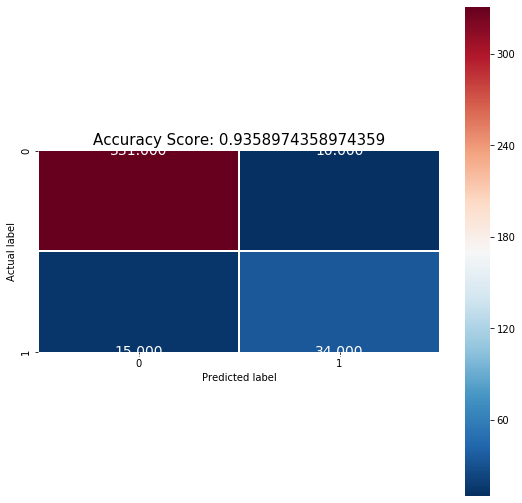

In [63]:
plt.figure(figsize=(9,9))
sns.heatmap(confuse, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu_r',annot_kws={"size":14})
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(deci_tree_gini_accuracy)
plt.title(all_sample_title, size = 15);

## Using Entropy

[Text(203.59028571428573, 212.004, 'X[0] <= 8.15\nentropy = 0.529\nsamples = 910\nvalue = [801, 109]'),
 Text(122.56868571428572, 201.132, 'X[220] <= 0.5\nentropy = 0.255\nsamples = 583\nvalue = [558, 25]'),
 Text(118.48731428571429, 190.26, 'X[35] <= 0.5\nentropy = 0.233\nsamples = 580\nvalue = [558, 22]'),
 Text(102.16182857142857, 179.388, 'X[422] <= 0.5\nentropy = 0.197\nsamples = 557\nvalue = [540, 17]'),
 Text(93.99908571428573, 168.516, 'X[62] <= 0.5\nentropy = 0.18\nsamples = 554\nvalue = [539, 15]'),
 Text(89.9177142857143, 157.644, 'X[121] <= 0.5\nentropy = 0.17\nsamples = 553\nvalue = [539, 14]'),
 Text(85.83634285714287, 146.772, 'X[254] <= 0.5\nentropy = 0.161\nsamples = 552\nvalue = [539, 13]'),
 Text(81.75497142857144, 135.9, 'X[105] <= 0.5\nentropy = 0.151\nsamples = 551\nvalue = [539, 12]'),
 Text(77.67360000000001, 125.02799999999999, 'X[412] <= 0.5\nentropy = 0.141\nsamples = 550\nvalue = [539, 11]'),
 Text(73.59222857142858, 114.156, 'X[369] <= 0.5\nentropy = 0.131\

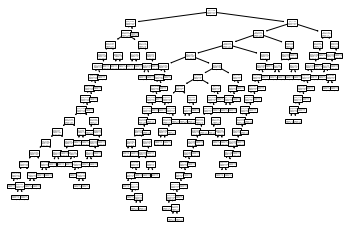

In [64]:
clf_e = tree.DecisionTreeClassifier(criterion="entropy")
clf_e = clf_e.fit(X_train, y_train)
y_pred = clf_e.predict(X_test)
tree.plot_tree(clf_e)

In [65]:
deci_tree_entr_accuracy = metrics.accuracy_score(y_test, y_pred)

In [66]:
print (("Accuracy: "), deci_tree_entr_accuracy*100, "%" )

Accuracy:  91.28205128205128 %


In [67]:
confuse = confusion_matrix(y_test,y_pred)

In [68]:
confuse

array([[329,  12],
       [ 22,  27]], dtype=int64)

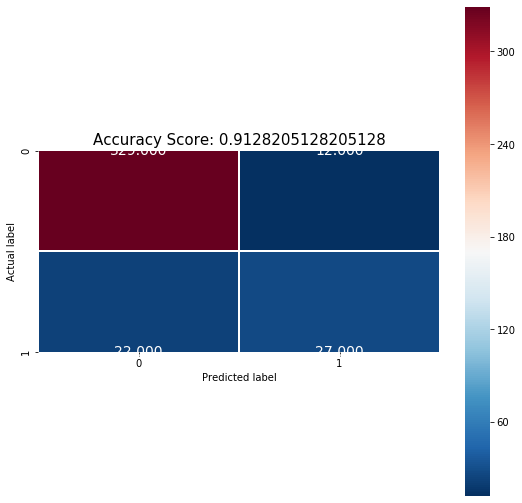

In [69]:
plt.figure(figsize=(9,9))
sns.heatmap(confuse, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu_r',annot_kws={"size":14})
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(deci_tree_entr_accuracy)
plt.title(all_sample_title, size = 15);

## Those were really hard to see so let's take the first few levels of each

## Gini pt.2

[Text(153.45000000000002, 190.26, 'X[0] <= 8.55\ngini = 0.211\nsamples = 910\nvalue = [801, 109]'),
 Text(83.7, 135.9, 'X[220] <= 0.5\ngini = 0.122\nsamples = 722\nvalue = [675, 47]'),
 Text(55.800000000000004, 81.53999999999999, 'X[378] <= 0.5\ngini = 0.115\nsamples = 719\nvalue = [675, 44]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.108\nsamples = 716\nvalue = [675, 41]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(223.20000000000002, 135.9, 'X[1] <= 0.5\ngini = 0.442\nsamples = 188\nvalue = [126, 62]'),
 Text(167.4, 81.53999999999999, 'X[80] <= 0.5\ngini = 0.395\nsamples = 155\nvalue = [113, 42]'),
 Text(139.5, 27.180000000000007, 'gini = 0.377\nsamples = 151\nvalue = [113, 38]'),
 Text(195.3, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(279.0, 81.53999999999999, 'X[317] <= 0.5\ngini = 0.478\nsamples = 33\nvalue = [13

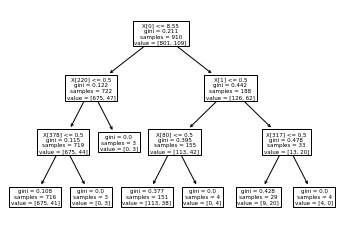

In [70]:
clf_g_cond = tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
clf_g_cond = clf_g_cond.fit(X_train, y_train)
y_pred = clf_g_cond.predict(X_test)
tree.plot_tree(clf_g_cond)

## Entropy pt.2

[Text(153.45000000000002, 190.26, 'X[0] <= 8.15\nentropy = 0.529\nsamples = 910\nvalue = [801, 109]'),
 Text(83.7, 135.9, 'X[220] <= 0.5\nentropy = 0.255\nsamples = 583\nvalue = [558, 25]'),
 Text(55.800000000000004, 81.53999999999999, 'X[35] <= 0.5\nentropy = 0.233\nsamples = 580\nvalue = [558, 22]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.197\nsamples = 557\nvalue = [540, 17]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.755\nsamples = 23\nvalue = [18, 5]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(223.20000000000002, 135.9, 'X[0] <= 9.25\nentropy = 0.822\nsamples = 327\nvalue = [243, 84]'),
 Text(167.4, 81.53999999999999, 'X[35] <= 0.5\nentropy = 0.756\nsamples = 285\nvalue = [223, 62]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.713\nsamples = 271\nvalue = [218, 53]'),
 Text(195.3, 27.180000000000007, 'entropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(279.0, 81.53999999999999, 'X[1] <= 0.5\nentro

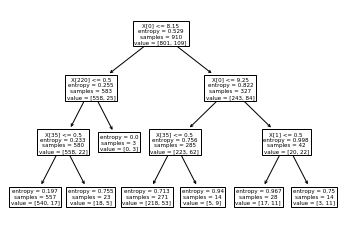

In [71]:
clf_e_cond = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_e_cond = clf_e_cond.fit(X_train, y_train)
y_pred = clf_e_cond.predict(X_test)
tree.plot_tree(clf_e_cond)

# KNN

In [72]:
#using columns that could determine if a game is a hit or not
X=df[['Genre', 'ESRB_Rating', 'Platform', 'Developer', 'Critic_Score']]
#getting our target class
y=df['Hit Game']
#get_dummies to convert categorical variables into indicator values
X = pd.get_dummies(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [74]:
cv_scores = []

In [75]:
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

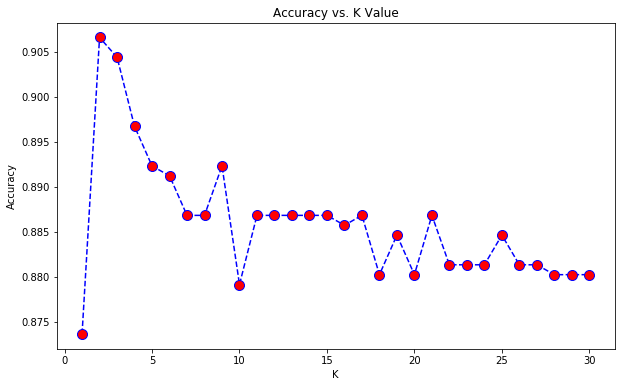

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31),cv_scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy');

In [77]:
k_star = np.argmax(cv_scores)

In [78]:
print(k_star)

1


In [79]:
knn_accuracy = 0

In [80]:
knn = KNeighborsClassifier(n_neighbors=k_star)

In [81]:
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_accuracy = scores.mean()

In [82]:
print (("Accuracy: "), knn_accuracy*100, "%" )

Accuracy:  87.36263736263737 %


In [83]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [84]:
y_pred = knn.predict(X_test)

In [85]:
confuse = confusion_matrix(y_test,y_pred)

In [86]:
confuse

array([[325,  17],
       [ 20,  28]], dtype=int64)

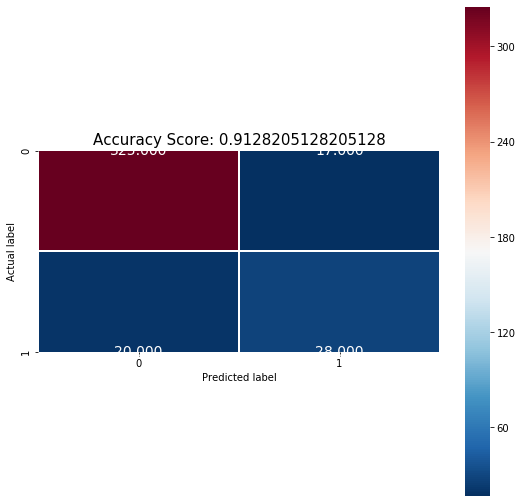

In [87]:
plt.figure(figsize=(9,9))
sns.heatmap(confuse, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu_r',annot_kws={"size":14})
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(deci_tree_entr_accuracy)
plt.title(all_sample_title, size = 15);

# Comparing Accuracies

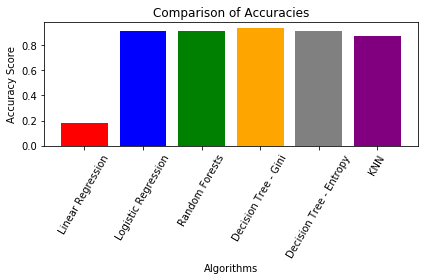

In [97]:
labels = ('Linear Regression', 'Logistic Regression', 'Random Forests', 'Decision Tree - Gini', 'Decision Tree - Entropy', 'KNN')
values = [lin_accuracy, log_accuracy, random_accuracy, deci_tree_gini_accuracy, deci_tree_entr_accuracy, knn_accuracy]
y_pos = np.arange(len(labels))

plt.bar(y_pos, values, color=["red", "blue", "green", "orange", "grey", "purple"])
plt.title("Comparison of Accuracies")
plt.ylabel("Accuracy Score")
plt.xlabel("Algorithms")
plt.xticks(y_pos, labels, rotation=60)
plt.tight_layout()
plt.savefig("compare", dpi = 600)
plt.show()
